# Portfolio Project: Online Retail Exploratory Data Analysis with Python

## Overview

In this project, you will step into the shoes of an entry-level data analyst at an online retail company, helping interpret real-world data to help make a key business decision.

## Case Study
In this project, you will be working with transactional data from an online retail store. The dataset contains information about customer purchases, including product details, quantities, prices, and timestamps. Your task is to explore and analyze this dataset to gain insights into the store's sales trends, customer behavior, and popular products.

By conducting exploratory data analysis, you will identify patterns, outliers, and correlations in the data, allowing you to make data-driven decisions and recommendations to optimize the store's operations and improve customer satisfaction. Through visualizations and statistical analysis, you will uncover key trends, such as the busiest sales months, best-selling products, and the store's most valuable customers. Ultimately, this project aims to provide actionable insights that can drive strategic business decisions and enhance the store's overall performance in the competitive online retail market.

## Project Objectives
1. Describe data to answer key questions to uncover insights
2. Gain valuable insights that will help improve online retail performance
3. Provide analytic insights and data-driven recommendations

## Dataset

The dataset you will be working with is the "Online Retail" dataset. It contains transactional data of an online retail store from 2010 to 2011. The dataset is available as a .xlsx file named `Online Retail.xlsx`. This data file is already included in the Coursera Jupyter Notebook environment, however if you are working off-platform it can also be downloaded [here](https://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx).

The dataset contains the following columns:

- InvoiceNo: Invoice number of the transaction
- StockCode: Unique code of the product
- Description: Description of the product
- Quantity: Quantity of the product in the transaction
- InvoiceDate: Date and time of the transaction
- UnitPrice: Unit price of the product
- CustomerID: Unique identifier of the customer
- Country: Country where the transaction occurred

## Tasks

You may explore this dataset in any way you would like - however if you'd like some help getting started, here are a few ideas:

1. Load the dataset into a Pandas DataFrame and display the first few rows to get an overview of the data.
2. Perform data cleaning by handling missing values, if any, and removing any redundant or unnecessary columns.
3. Explore the basic statistics of the dataset, including measures of central tendency and dispersion.
4. Perform data visualization to gain insights into the dataset. Generate appropriate plots, such as histograms, scatter plots, or bar plots, to visualize different aspects of the data.
5. Analyze the sales trends over time. Identify the busiest months and days of the week in terms of sales.
6. Explore the top-selling products and countries based on the quantity sold.
7. Identify any outliers or anomalies in the dataset and discuss their potential impact on the analysis.
8. Draw conclusions and summarize your findings from the exploratory data analysis.

## Task 1: Load the Data

In [1]:
# your code here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Configuración de visualizaciones
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
%matplotlib inline

In [4]:
# Cargar dataset
df = pd.read_excel('Online Retail.xlsx', engine='openpyxl')



In [5]:
# Vista datos

display(df.head())

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [6]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB
None


In [8]:
display(df.describe())

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.000000,541909,541909.000000,406829.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.081158,NaN,96.759853,1713.600303


In [12]:
# Análisis de valores nulos
null_analysis = pd.DataFrame({'Nulos': df.isnull().sum()})
display(null_analysis[null_analysis['Nulos'] > 0])


,Nulos
Description,1454
CustomerID,135080


In [13]:
# copia para limpieza
df_clean = df.copy()

# Eliminar filas con CustomerID nulo
df_clean = df_clean.dropna(subset=['CustomerID'])

# Crear variable de monto total por transacción
df_clean['TotalAmount'] = df_clean['Quantity'] * df_clean['UnitPrice']

# Extraer componentes de fecha para análisis temporal
df_clean['InvoiceDate'] = pd.to_datetime(df_clean['InvoiceDate'])
df_clean['Year'] = df_clean['InvoiceDate'].dt.year
df_clean['Month'] = df_clean['InvoiceDate'].dt.month
df_clean['DayOfWeek'] = df_clean['InvoiceDate'].dt.day_name()
df_clean['Hour'] = df_clean['InvoiceDate'].dt.hour


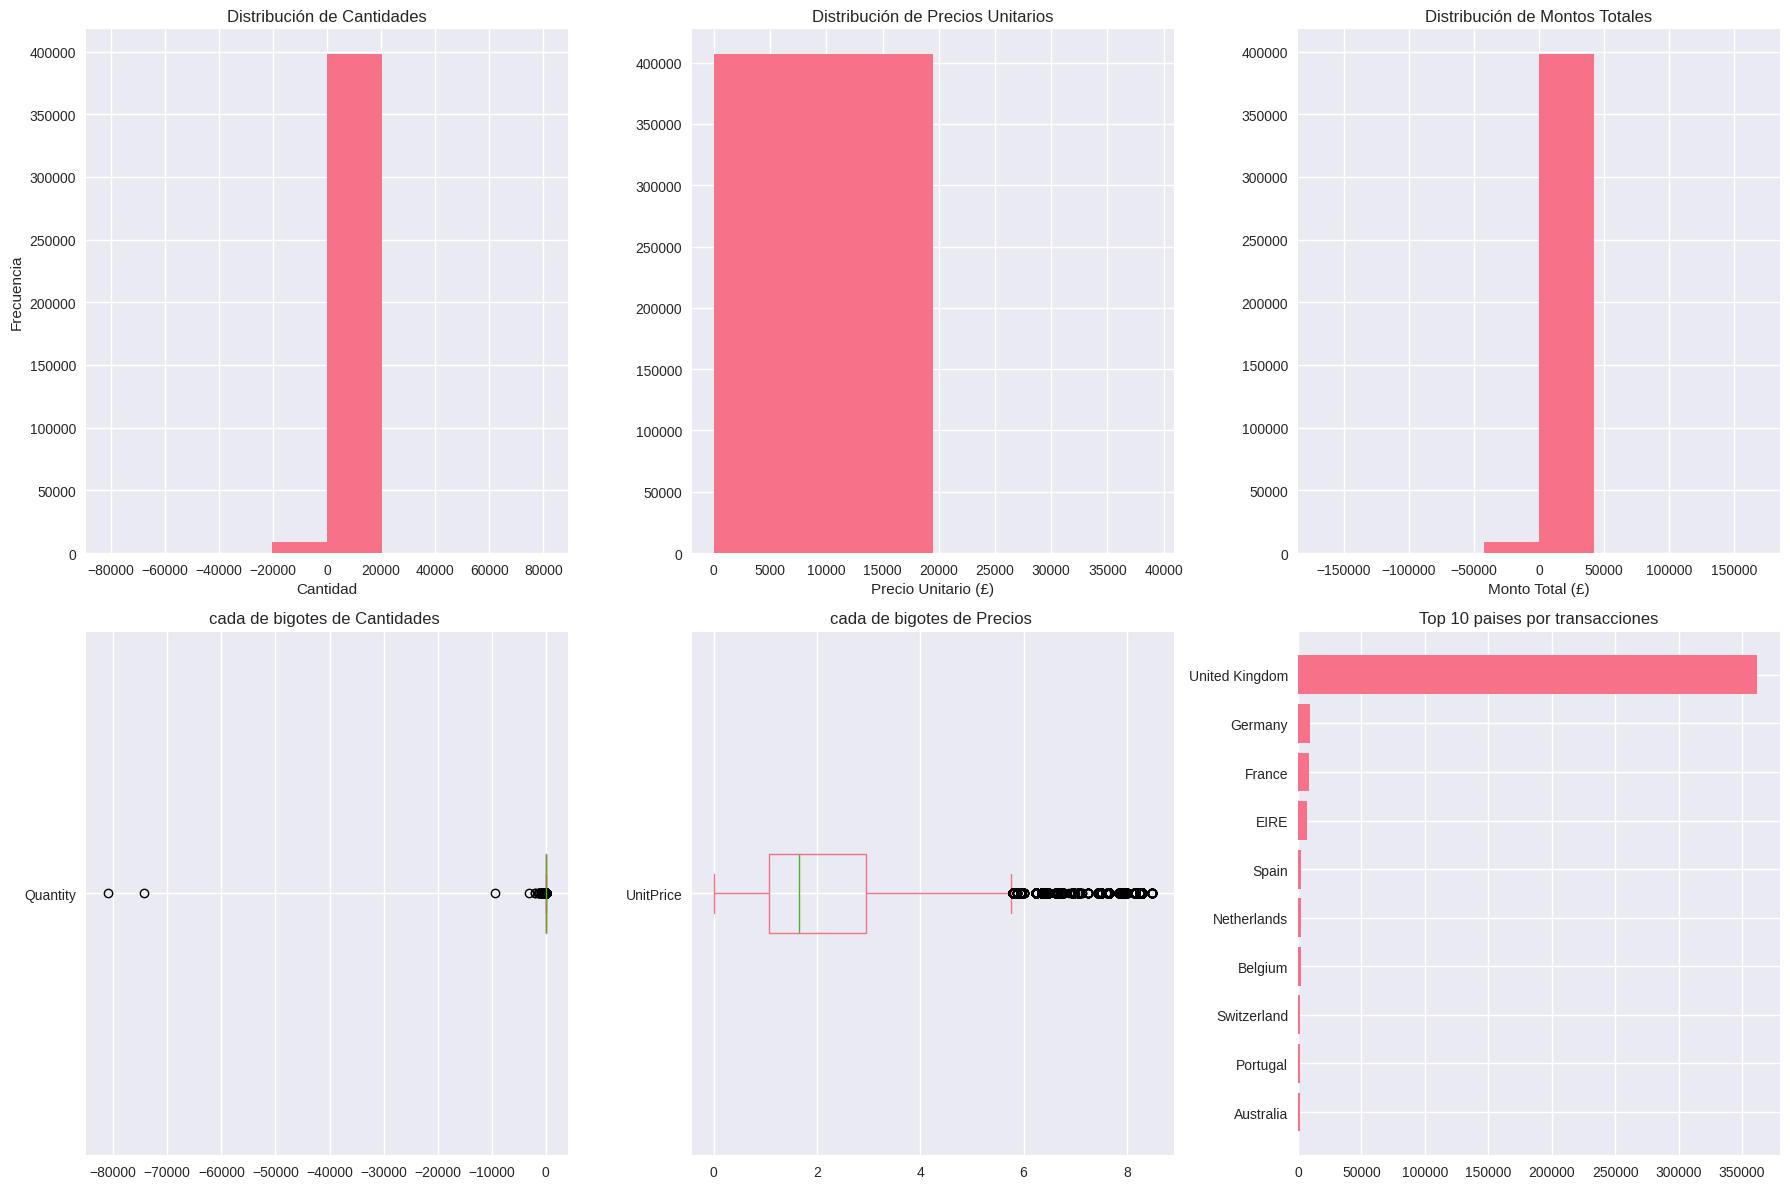

In [27]:
# subplots
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Distribucion de Quantity
df_clean['Quantity'].hist(bins=8, ax=axes[0,0])
axes[0,0].set_title('Distribución de Cantidades', fontsize=12)
axes[0,0].set_xlabel('Cantidad')
axes[0,0].set_ylabel('Frecuencia')

# Distribucion de UnitPrice
df_clean['UnitPrice'].hist(bins=2, ax=axes[0,1])
axes[0,1].set_title('Distribución de Precios Unitarios', fontsize=12)
axes[0,1].set_xlabel('Precio Unitario (£)')

# Distribucion de TotalAmount
df_clean['TotalAmount'].hist(bins=8, ax=axes[0,2])
axes[0,2].set_title('Distribución de Montos Totales', fontsize=12)
axes[0,2].set_xlabel('Monto Total (£)')

# Diagrama cada de bigotes de Quantity
df_clean[df_clean['Quantity'] < df_clean['Quantity'].quantile(0.95)]['Quantity'].plot(
    kind='box', ax=axes[1,0], vert=False)
axes[1,0].set_title('cada de bigotes de Cantidades ')

# Diagrama cada de bigotes de UnitPrice
df_clean[df_clean['UnitPrice'] < df_clean['UnitPrice'].quantile(0.95)]['UnitPrice'].plot(
    kind='box', ax=axes[1,1], vert=False)
axes[1,1].set_title('cada de bigotes de Precios ')

# Distribución por país (top 10)
top_countries = df_clean['Country'].value_counts().head(10)
axes[1,2].barh(range(len(top_countries)), top_countries.values)
axes[1,2].set_yticks(range(len(top_countries)))
axes[1,2].set_yticklabels(top_countries.index)
axes[1,2].set_title('Top 10 paises por transacciones')
axes[1,2].invert_yaxis()

plt.tight_layout()
plt.show()


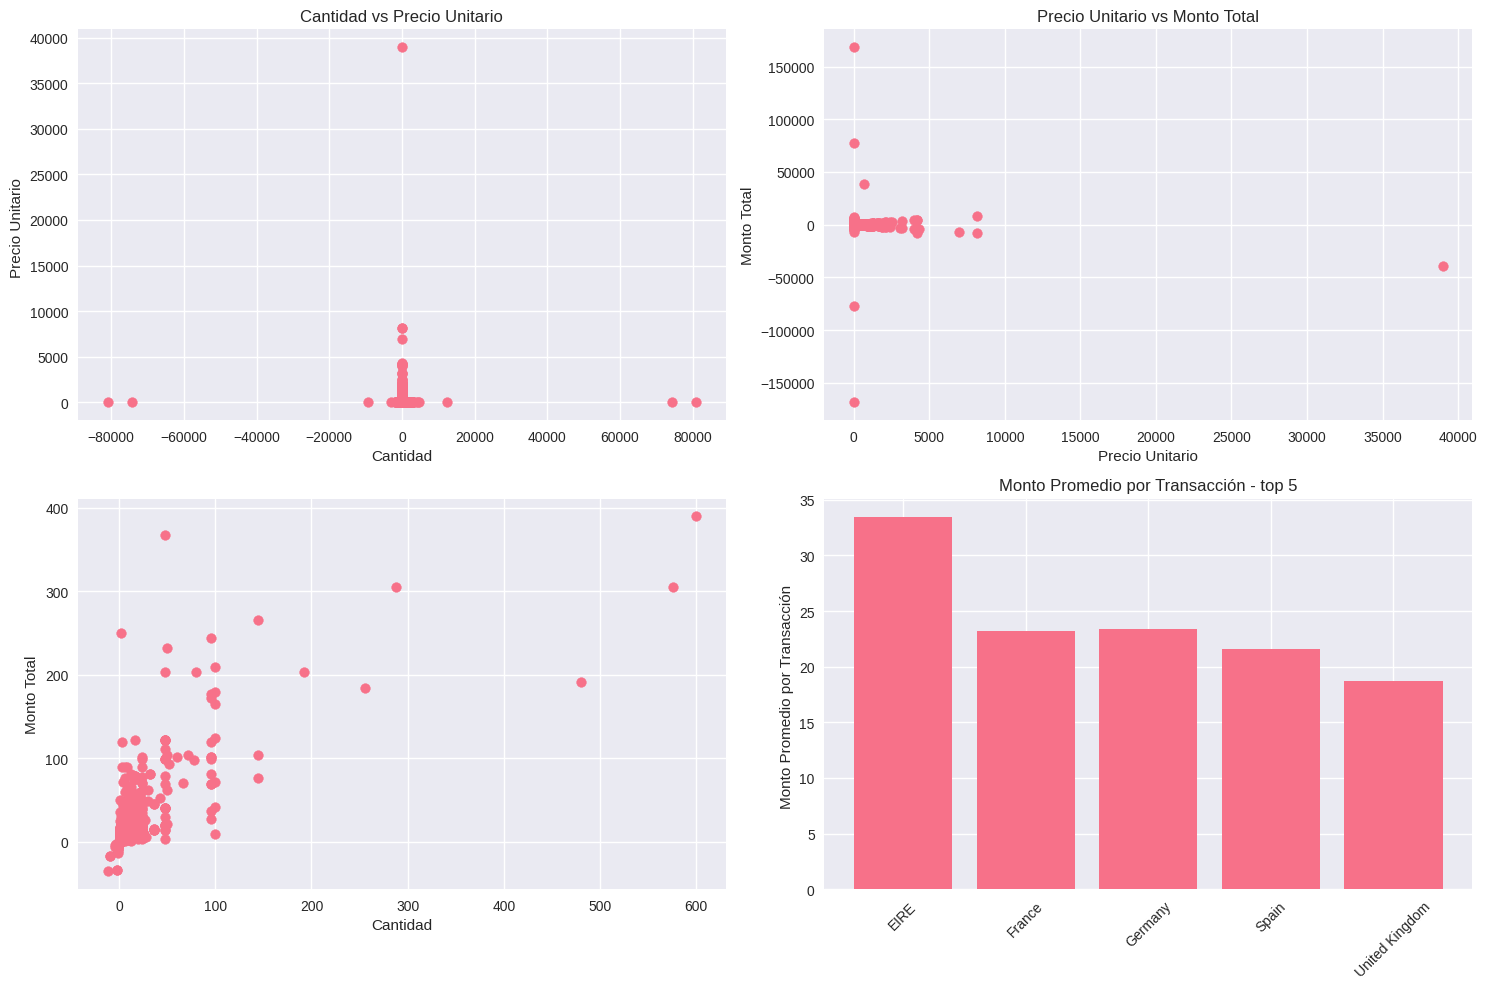

In [33]:
# Scatter plots para relaciones clave, vibariado
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Quantity vs UnitPrice
axes[0,0].scatter(df_clean['Quantity'], df_clean['UnitPrice'])
axes[0,0].set_xlabel('Cantidad')
axes[0,0].set_ylabel('Precio Unitario ')
axes[0,0].set_title('Cantidad vs Precio Unitario')

# UnitPrice vs TotalAmount
axes[0,1].scatter(df_clean['UnitPrice'], df_clean['TotalAmount'])
axes[0,1].set_xlabel('Precio Unitario')
axes[0,1].set_ylabel('Monto Total')
axes[0,1].set_title('Precio Unitario vs Monto Total')

# Relación entre cantidad y monto total (muestra limitada para mejor visualización)
sample_df = df_clean.sample(1000, random_state=42)
axes[1,0].scatter(sample_df['Quantity'], sample_df['TotalAmount'])
axes[1,0].set_xlabel('Cantidad')
axes[1,0].set_ylabel('Monto Total')


# Distribución de montos por país (top 5)
top5_countries = df_clean['Country'].value_counts().head(5).index
country_amounts = df_clean[df_clean['Country'].isin(top5_countries)].groupby('Country')['TotalAmount'].mean()
axes[1,1].bar(range(len(country_amounts)), country_amounts.values,)
axes[1,1].set_xticks(range(len(country_amounts)))
axes[1,1].set_xticklabels(country_amounts.index, rotation=45)
axes[1,1].set_ylabel('Monto Promedio por Transacción ')
axes[1,1].set_title('Monto Promedio por Transacción - top 5')

plt.tight_layout()
plt.show()

Ventas_Totales  Transacciones  Clientes_Unicos
Year Month                                                
2010 12         554604.020           1708              948
2011 1          475074.380           1236              783
     2          436546.150           1202              798
     3          579964.610           1619             1020
     4          426047.851           1384              899
     5          648251.080           1849             1079
     6          608013.160           1707             1051
     7          574238.481           1593              993
     8          616368.000           1544              980
     9          931440.372           2078             1302
     10         974603.590           2263             1425
     11        1132407.740           3086             1711
     12         342506.380            921              686

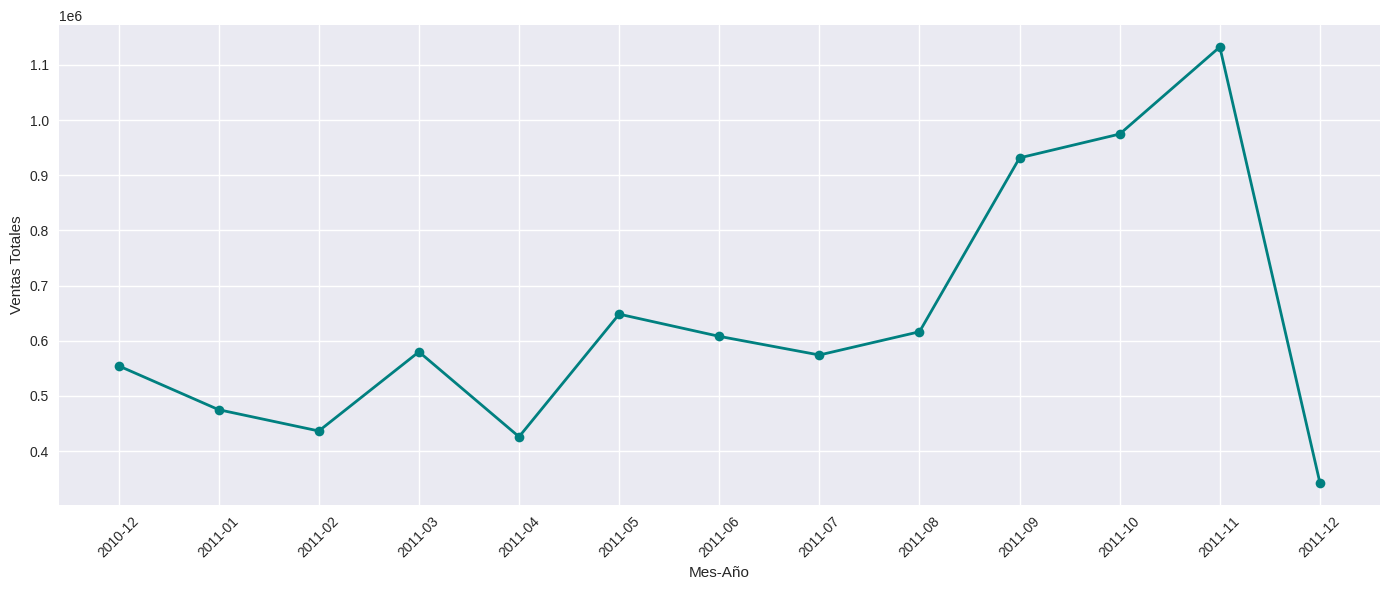

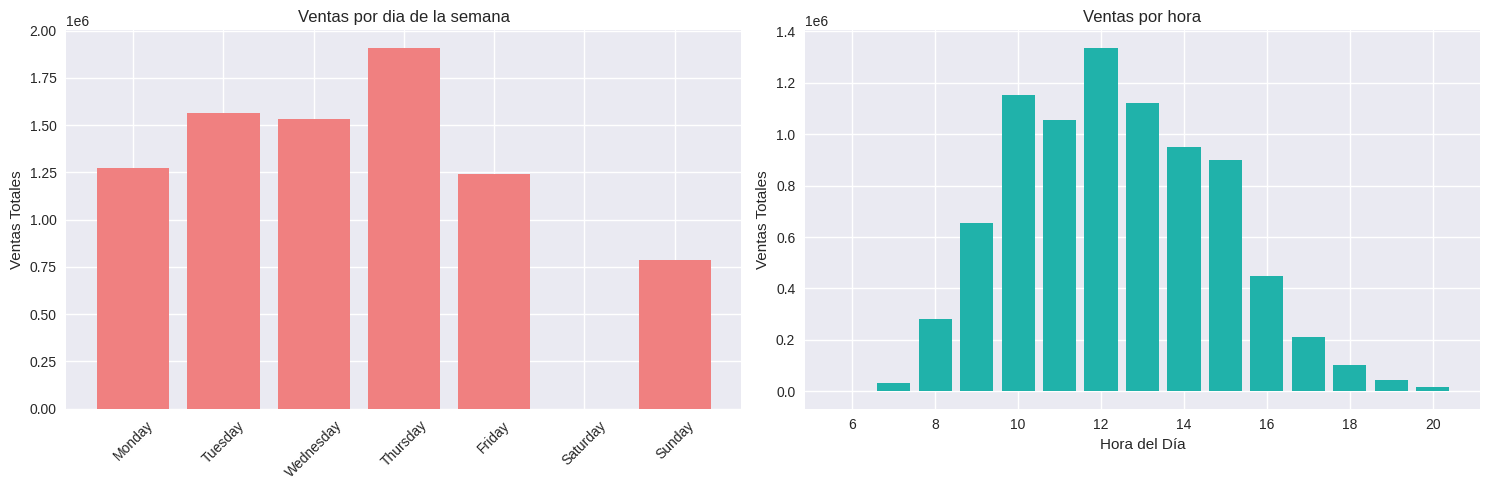

In [37]:
# Ventas mensuales, con valores unicos usando nunique
monthly_sales = df_clean.groupby(['Year', 'Month']).agg({ 'TotalAmount': 'sum','InvoiceNo': 'nunique','CustomerID': 'nunique'}).rename(columns={
    'TotalAmount': 'Ventas_Totales','InvoiceNo': 'Transacciones','CustomerID': 'Clientes_Unicos'})
display(monthly_sales)

# Gráfico de tendencia mensual
plt.figure(figsize=(14, 6))
months = [f"{year}-{month:02d}" for year, month in monthly_sales.index]
plt.plot(months, monthly_sales['Ventas_Totales'], marker='o', linewidth=2, color='teal')
plt.xlabel('Mes-Año')
plt.ylabel('Ventas Totales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Análisis por día de la semana y hora
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Ventas por día de la semana
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sales_by_day = df_clean.groupby('DayOfWeek')['TotalAmount'].sum().reindex(day_order)
ax1.bar(sales_by_day.index, sales_by_day.values, color='lightcoral')
ax1.set_title('Ventas por dia de la semana', fontsize=12)
ax1.set_ylabel('Ventas Totales')
ax1.tick_params(axis='x', rotation=45)

# Ventas por hora del día
sales_by_hour = df_clean.groupby('Hour')['TotalAmount'].sum()
ax2.bar(sales_by_hour.index, sales_by_hour.values, color='lightseagreen')
ax2.set_title('Ventas por hora', fontsize=12)
ax2.set_xlabel('Hora del Día')
ax2.set_ylabel('Ventas Totales')

plt.tight_layout()
plt.show()


In [38]:
# Top productos por ingresos
top_products = df_clean.groupby(['StockCode', 'Description']).agg({'Quantity': 'sum','TotalAmount': 'sum','InvoiceNo': 'nunique'}).rename(columns={
    'Quantity': 'Unidades_Vendidas','TotalAmount': 'Ingresos_Totales','InvoiceNo': 'Transacciones'
}).sort_values('Ingresos_Totales', ascending=False)

display(top_products.head(10))

# Análisis de clientes
customer_analysis = df_clean.groupby('CustomerID').agg({'InvoiceNo': 'nunique','TotalAmount': 'sum','Quantity': 'sum'
}).rename(columns={
    'InvoiceNo': 'Total_Transacciones','TotalAmount': 'Gasto_Total','Quantity': 'Total_Unidades'})

display(customer_analysis.describe())

,,Unidades_Vendidas,Ingresos_Totales,Transacciones
StockCode,Description,,,
22423,REGENCY CAKESTAND 3 TIER,11555,132870.40,1884
85123A,WHITE HANGING HEART T-LIGHT HOLDER,34147,93823.85,2013
85099B,JUMBO BAG RED RETROSPOT,45066,83236.76,1643
47566,PARTY BUNTING,15027,67687.53,1399
POST,POSTAGE,3002,66710.24,1194
84879,ASSORTED COLOUR BIRD ORNAMENT,35314,56499.22,1385
23084,RABBIT NIGHT LIGHT,27094,51137.80,816
79321,CHILLI LIGHTS,9570,45936.81,525
22086,PAPER CHAIN KIT 50'S CHRISTMAS,15164,41500.48,990


,Total_Transacciones,Gasto_Total,Total_Unidades
count,4372.000000,4372.000000,4372.000000
mean,5.075480,1898.459701,1122.344007
std,9.338754,8219.345141,4672.790720
min,1.000000,-4287.630000,-303.000000
25%,1.000000,293.362500,153.000000
50%,3.000000,648.075000,365.000000
75%,5.000000,1611.725000,962.250000
max,248.000000,279489.020000,196719.000000
